In [422]:
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt
import numpy as np
import fiona
import matplotlib

highres_colors = [
    "#0000FF",
    "#008000",
    "#80FF80",
    "#806060"]

highres_colors_5_class = [
    "#0000FF",
    "#008000",
    "#80FF80",
    "#806060",
    "#FF0000"]

highres_colors_6_class = [
    "#0000FF",
    "#0000FF",
    "#008000",
    "#80FF80",
    "#806060",
    "#FF0000"]

one_for_all = [
    "#FFFFFF",
    "#FF0000"
]
highres_cmap = matplotlib.colors.ListedColormap(highres_colors)
highres_5_cmap  = matplotlib.colors.ListedColormap(highres_colors_5_class)
highres_6_cmap = matplotlib.colors.ListedColormap(highres_colors_6_class)
one_for_all_cmap = matplotlib.colors.ListedColormap(one_for_all)

# Unsupervised Tuned 5 class

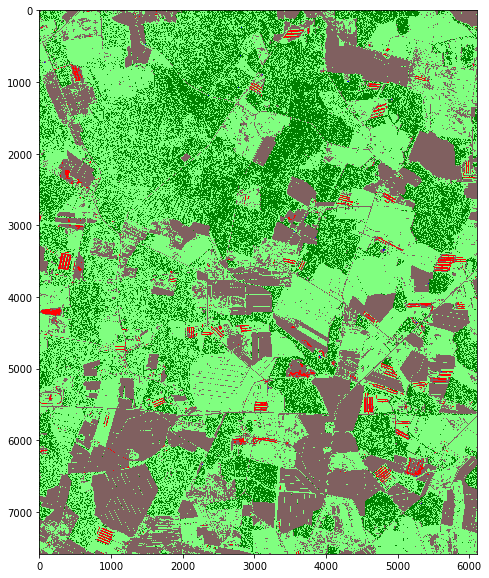

In [423]:
src = rasterio.open("../landcover-old/web_tool/data/test_inference_again/test_demo.tif")
plt.imshow(src.read(1),vmin=0, vmax=6, cmap=highres_6_cmap)
plt.rcParams["figure.figsize"] = (20,10)
plt.show()

In [424]:
print(np.unique(src.read(1), return_counts=True))

(array([0, 1, 2, 3, 4, 5], dtype=uint8), array([    2532,     2255,  9724002, 24412549, 11720710,   488412]))


# New Naip demo tuned 2 epoch

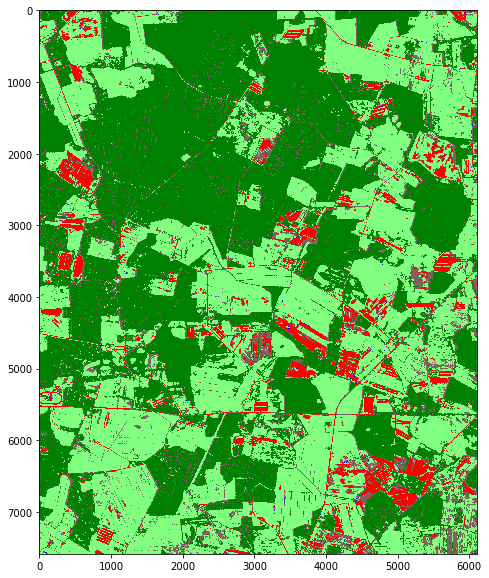

In [428]:
src_demo = rasterio.open("../landcover-old/web_tool/data/test_inference_demo_tuned/test_demo_2.tif")
plt.imshow(src_demo.read(1),vmin=0, vmax=5, cmap=highres_6_cmap)
plt.rcParams["figure.figsize"] = (20,10)
plt.show()

In [429]:
np.unique(src_demo.read(1), return_counts=True)

(array([0, 1, 2, 3, 4, 5], dtype=uint8),
 array([    2829,    33567, 20803633, 19380627,  3700510,  2429294]))

# 10 epoch Naip Demo tuned

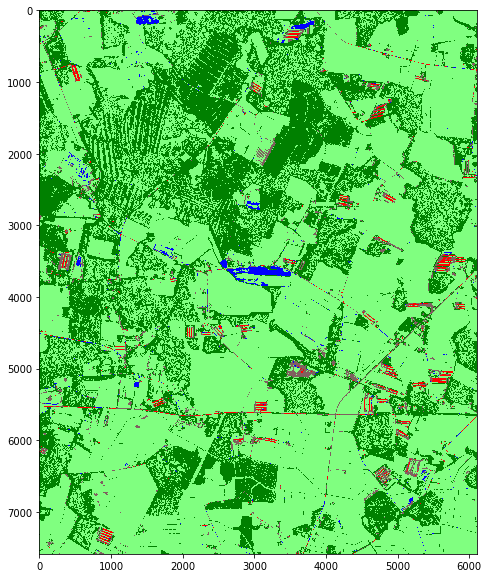

In [430]:
src_demo_10 = rasterio.open("../landcover-old/web_tool/data/test_inference_demo_tuned/test_demo_10.tif")
plt.imshow(src_demo_10.read(1),vmin=0, vmax=5, cmap=highres_6_cmap)
plt.rcParams["figure.figsize"] = (20,10)
plt.show()

In [407]:
np.unique(src_demo.read(1), return_counts=True)

(array([0, 1, 2, 3, 4, 5], dtype=uint8),
 array([    2829,    33567, 20803633, 19380627,  3700510,  2429294]))

# Naip demo tuned 1 epoch

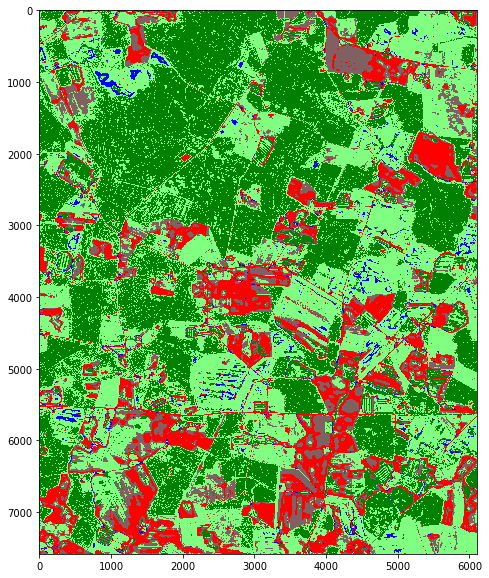

In [427]:
src_demo = rasterio.open("../landcover-old/web_tool/data/test_inference_demo_tuned/test_demo_1.tif")
plt.imshow(src_demo.read(1)[1:],vmin=0, vmax=4, cmap=highres_5_cmap)
plt.rcParams["figure.figsize"] = (20,10)x
plt.show()

# Metrics

In [186]:
import sklearn.metrics

In [412]:
def get_metrics(y_pred):
    src_masked = rasterio.open("./m_3807537_ne_18_1_20170611_rasterized2.tif")
    y_true = np.array(src_masked.read())
    y_true = y_true.squeeze()
    tp = np.sum((y_true == 1) & (y_pred == 1))
    tn = np.sum((y_true == 0) & (y_pred == 0))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))

    assert tp + tn + fp + fn == y_true.size

    n = tp + fp + tn + fn

    acc = (tp+tn)/n
    recall = (tp/(tp+fn))
    precision = tp / (tp + fp)
    iou = tp /(tp + fn + fp)

    print("IOU: {}".format(iou))
    print("Accuracy: {}".format(acc))
    print("Precision: {}".format(precision))
    print("Recall: {}".format(recall))

# Tuned autoencoder - 1 epoch

In [416]:
# New
src = rasterio.open("../landcover-old/web_tool/data/test_inference_again/test_demo.tif")
raw = np.array(src.read())
y_pred = (raw == 5) # chicken
y_pred = y_pred.astype(int)

# Old
# src = rasterio.open("../landcover-old/web_tool/data/test_inference/m_3807537_ne_18_1_20170611_class.tif")
# raw = np.array(src.read())
# y_pred = (raw == 4) # chicken
# y_pred = y_pred.astype(int)

y_pred = y_pred.squeeze()

get_metrics(y_pred, y_true)

IOU: 0.4721123138230224
Accuracy: 0.993552340149375
Precision: 0.5472347116778458
Recall: 0.7747310082552639


In [417]:
np.unique(src.read(1), return_counts=True)

(array([0, 1, 2, 3, 4, 5], dtype=uint8),
 array([    2532,     2255,  9724002, 24412549, 11720710,   488412]))

# Tuned demo - 2 epochs

In [418]:
# New
src_demo = rasterio.open("../landcover-old/web_tool/data/test_inference_demo_tuned/test_demo1.tif")
raw_demo = np.array(src_demo.read())
y_pred_demo = (raw_demo == 5) # chicken
y_pred_demo = y_pred_demo.astype(int)
y_pred_demo = y_pred_demo.squeeze()

get_metrics(y_pred_demo, y_true)

# Old
# src_demo = rasterio.open("../landcover-old/web_tool/data/test_inference_demo_tuned/m_3807537_ne_18_1_20170611_class.tif")
# raw_demo = np.array(src_demo.read())
# y_pred_demo = (raw_demo == 4) # chicken
# y_pred_demo = y_pred_demo.astype(int)
# y_pred_demo = y_pred_demo.squeeze()

IOU: 0.1371166367114731
Accuracy: 0.9545802997424405
Precision: 0.13770708691496378
Recall: 0.9696775577404694


In [419]:
np.unique(src_demo.read(1), return_counts=True)

(array([0, 1, 2, 3, 4, 5], dtype=uint8),
 array([    2829,    33567, 20803633, 19380627,  3700510,  2429294]))

# Tuned demo - 10 epochs

In [420]:
# New
src_demo_10= rasterio.open("../landcover-old/web_tool/data/test_inference_demo_tuned/test_demo_10.tif")
raw_demo_10 = np.array(src_demo_10.read())
y_pred_demo_10 = (raw_demo_10 == 5) # chicken
y_pred_demo_10 = y_pred_demo_10.astype(int)
y_pred_demo_10 = y_pred_demo_10.squeeze()

get_metrics(y_pred_demo_10, y_true)

IOU: 0.39690542803565876
Accuracy: 0.9935122110977971
Precision: 0.5629825389871589
Recall: 0.573645185975327


In [421]:
np.unique(src_demo_10.read(1), return_counts=True)

(array([0, 1, 2, 3, 4, 5], dtype=uint8),
 array([     758,   315337, 13752723, 30950580,   979536,   351526]))